# Import Libraries 

In [1]:
import pandas as pd
import os
import io 
import seaborn as sns
import numpy as np                                
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
import datetime
from datetime import datetime as dt


In [2]:
#ALL ABOUT DATA
def Data_Details(DF, dataname):

    print("################################################\n"+dataname+ "DATA FRAME SHAPE:")
    print(DF.shape)
    print("################################################\n"+dataname+"DATA FRAME HEAD:")
    print(DF.head(10))
    print("################################################\n"+dataname+"DATA FRAME DESCRIBTION:")
    print(DF.describe())
    print("################################################\n"+dataname+"DATA FRAME INFO:")
    print(DF.info())
    print("################################################\n"+dataname+"DATA FRAME NULLS:")
    print(DF.isna().sum())  
    print("-------------------------------------------------\n")

# Reading Data

In [8]:
#Reading the data
dataframe = pd.read_csv("./Dataset/Train.csv")
df1=dataframe.copy()

dataframe2 = pd.read_csv("./Dataset/Weather.csv")
df2=dataframe2.copy()

dataframe3 = pd.read_csv("./Dataset/Test.csv")
df3=dataframe3.copy()


In [10]:
import xml.etree.ElementTree as ET

xml_data = open('./Dataset/Holidays.xml', 'r').read()  # Read file
root = ET.XML(xml_data)  # Parse XML

holidaydata = []
holidaycols = ['date', 'description']
for i, child in enumerate(root):
    holidaydata.append([subchild.text for subchild in child])

df_holiday = pd.DataFrame(holidaydata)  # Write in DF and transpose it
df_holiday.columns = holidaycols  # Update column names
df_holiday.head()

df4=df_holiday.copy()



# Exploring Data

In [11]:
#Exploring Dataset
Data_Details(df1,"Train")
Data_Details(df2,"Weather")
Data_Details(df3,"Test")
Data_Details(df4,"Holiday")


################################################
TrainDATA FRAME SHAPE:
(6407, 16)
################################################
TrainDATA FRAME HEAD:
   ID        Lat         Lng   Bump  Distance(mi)  Crossing  Give_Way  \
0   0  37.762150 -122.405660  False         0.044     False     False   
1   1  37.719157 -122.448254  False         0.000     False     False   
2   2  37.808498 -122.366852  False         0.000     False     False   
3   3  37.785930 -122.391080  False         0.009     False     False   
4   4  37.719141 -122.448457  False         0.000     False     False   
5   5  37.769611 -122.416878  False         0.000     False     False   
6   6  37.727318 -122.402756  False         0.000     False     False   
7   7  37.731277 -122.435219  False         0.010     False     False   
8   8  37.787867 -122.396836  False         0.000      True     False   
9   9  37.756806 -122.403612  False         0.000     False     False   

   Junction  No_Exit  Railway  Roundabout 

# Merging Data

In [6]:
#Removing Duplicates Values from the weather dataset
df2.drop_duplicates(['Year','Month','Day','Hour'],inplace=True)

#Extracting Date information 
df1['timestamp']=pd.to_datetime(df1['timestamp'])
df1['Year']=df1['timestamp'].dt.year
df1['Month']=df1['timestamp'].dt.month
df1['Day']=df1['timestamp'].dt.day
df1['Hour']=df1['timestamp'].dt.hour
df1['Weekday']=df1['timestamp'].dt.strftime('%a')

df3['timestamp']=pd.to_datetime(df3['timestamp'])
df3['Year']=df3['timestamp'].dt.year
df3['Month']=df3['timestamp'].dt.month
df3['Day']=df3['timestamp'].dt.day
df3['Hour']=df3['timestamp'].dt.hour
df3['Weekday']=df3['timestamp'].dt.strftime('%a')


df4['Year'] = pd.DatetimeIndex(df4["date"]).year
df4['Month'] = pd.DatetimeIndex(df4["date"]).month
df4['Day'] = pd.DatetimeIndex(df4["date"]).day




In [7]:
#Merging the weather and holiday dataset with the train 
df_merged0 = pd.merge(df1,df2,how="left",on=['Year','Month','Day','Hour'] )
df_merged = pd.merge(df_merged0,df4,how="left", on=['Year','Month','Day'] )

#Merging the weather and holiday dataset with the test dataset
df_merged_test0 = pd.merge(df3,df2,how="left",on=['Year','Month','Day','Hour'] )
df_merged_test = pd.merge(df_merged_test0,df4,how="left",on=['Year','Month','Day'] )

In [9]:
#Exploring the Merged Dataset
Data_Details(df_merged,"Merged train data set ")
Data_Details(df_merged_test,"Merged test data set ")

################################################
Merged train data set DATA FRAME SHAPE:
(6407, 31)
################################################
Merged train data set DATA FRAME HEAD:
   ID        Lat         Lng   Bump  Distance(mi)  Crossing  Give_Way  \
0   0  37.762150 -122.405660  False         0.044     False     False   
1   1  37.719157 -122.448254  False         0.000     False     False   
2   2  37.808498 -122.366852  False         0.000     False     False   
3   3  37.785930 -122.391080  False         0.009     False     False   
4   4  37.719141 -122.448457  False         0.000     False     False   
5   5  37.769611 -122.416878  False         0.000     False     False   
6   6  37.727318 -122.402756  False         0.000     False     False   
7   7  37.731277 -122.435219  False         0.010     False     False   
8   8  37.787867 -122.396836  False         0.000      True     False   
9   9  37.756806 -122.403612  False         0.000     False     False   

   Junct

# Cleaning Data for training 

In [10]:
#Make a copy from the merged train dataset
df=df_merged.copy()

In [11]:
#Dropping the columns that have too much null values or redendant 
df.drop(columns=['Wind_Chill(F)','Precipitation(in)','timestamp','date'],axis=1,inplace=True)

#Dropping the missing values of raws 
df.dropna(axis=0,subset=['Weather_Condition', 'Temperature(F)','Humidity(%)','Visibility(mi)'],inplace=True)

#Filling the missing data of wind_speed with the mean 
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(),inplace=True)


In [12]:
# Get the number of unique values for each column
counts = df.nunique()

# Record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]

# drop useless columns
df.drop(df.columns[to_del], axis=1, inplace=True)




In [13]:
#Count the values of the coulmns to determine which column to keep
print('Wind_Speed(mph)\n',df['Wind_Speed(mph)'].value_counts())
print('Crossing\n',df['Crossing'].value_counts())
print('Give_Way\n',df['Give_Way'].value_counts())
print('Junction\n',df['Junction'].value_counts())
print('No_Exit\n',df['No_Exit'].value_counts())
print('Railway\n',df['Railway'].value_counts())
print('Stop\n',df['Stop'].value_counts())
print('Amenity\n',df['Amenity'].value_counts())
print('Side\n',df['Side'].value_counts())
print('Selected\n',df['Selected'].value_counts())



Wind_Speed(mph)
 0.000000     325
15.000000    311
10.868642    295
3.000000     271
5.000000     249
3.500000     240
8.000000     236
4.600000     229
10.000000    228
5.800000     228
6.900000     213
8.100000     209
9.000000     206
7.000000     201
6.000000     197
9.200000     190
12.700000    184
13.800000    182
10.400000    175
12.000000    171
14.000000    153
13.000000    149
11.500000    148
16.100000    134
17.300000    129
16.000000    112
17.000000    105
18.400000     98
23.000000     96
20.000000     91
18.000000     87
22.000000     86
21.000000     72
21.900000     70
19.600000     70
20.700000     60
24.200000     40
25.300000     25
26.000000     23
25.000000     22
27.600000     14
26.500000     14
28.000000     12
28.800000     12
30.000000      9
29.000000      6
24.000000      5
36.800000      5
32.000000      3
32.200000      3
33.400000      2
31.100000      2
31.000000      2
36.000000      2
40.300000      1
37.000000      1
29.900000      1
33.000000     

In [14]:
#Dropping the biased columns
df.drop(columns=['Give_Way','No_Exit','Selected'],axis=1,inplace=True)

# calculate duplicates
dups = df.duplicated()

# report if there are any duplicates
print(dups.any())

# list all duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

False
(6405, 22)


# Cleaning Data for test

In [15]:
#Make a copy from the merged test dataset
df_test=df_merged_test.copy()

#Dropping the columns that have too much null values or redendant 
df_test.drop(columns=['Wind_Chill(F)','Precipitation(in)','timestamp','date'],axis=1,inplace=True)

#Dropping the missing values of raws 
df_test.dropna(axis=0,subset=['Weather_Condition', 'Temperature(F)','Humidity(%)','Visibility(mi)'],inplace=True)

#Filling the missing data of wind_speed with the mean 
df_test['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(),inplace=True)

In [16]:
# Get number of unique values for each column
counts2 = df_test.nunique()

# Record columns to delete
to_del = [i for i,v in enumerate(counts2) if v == 1]

# Drop useless columns
df_test.drop(df_test.columns[to_del], axis=1, inplace=True)

#Dropping the biased columns
df_test.drop(columns=['Give_Way'],axis=1,inplace=True)

# calculate duplicates
dups = df_test.duplicated()

# report if there are any duplicates
print(dups.any())

# list all duplicate rows
df_test.drop_duplicates(inplace=True)
print(df_test.shape)

False
(1601, 21)


# Graphs

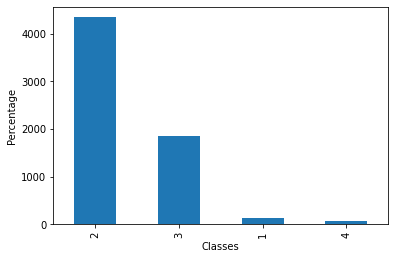

In [17]:
#Plotting the classes of the date 
df['Severity'].value_counts().plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

# the graph showed that the data id imbalanced so it will be biased

Text(0.5, 1.0, 'dataset correlation')

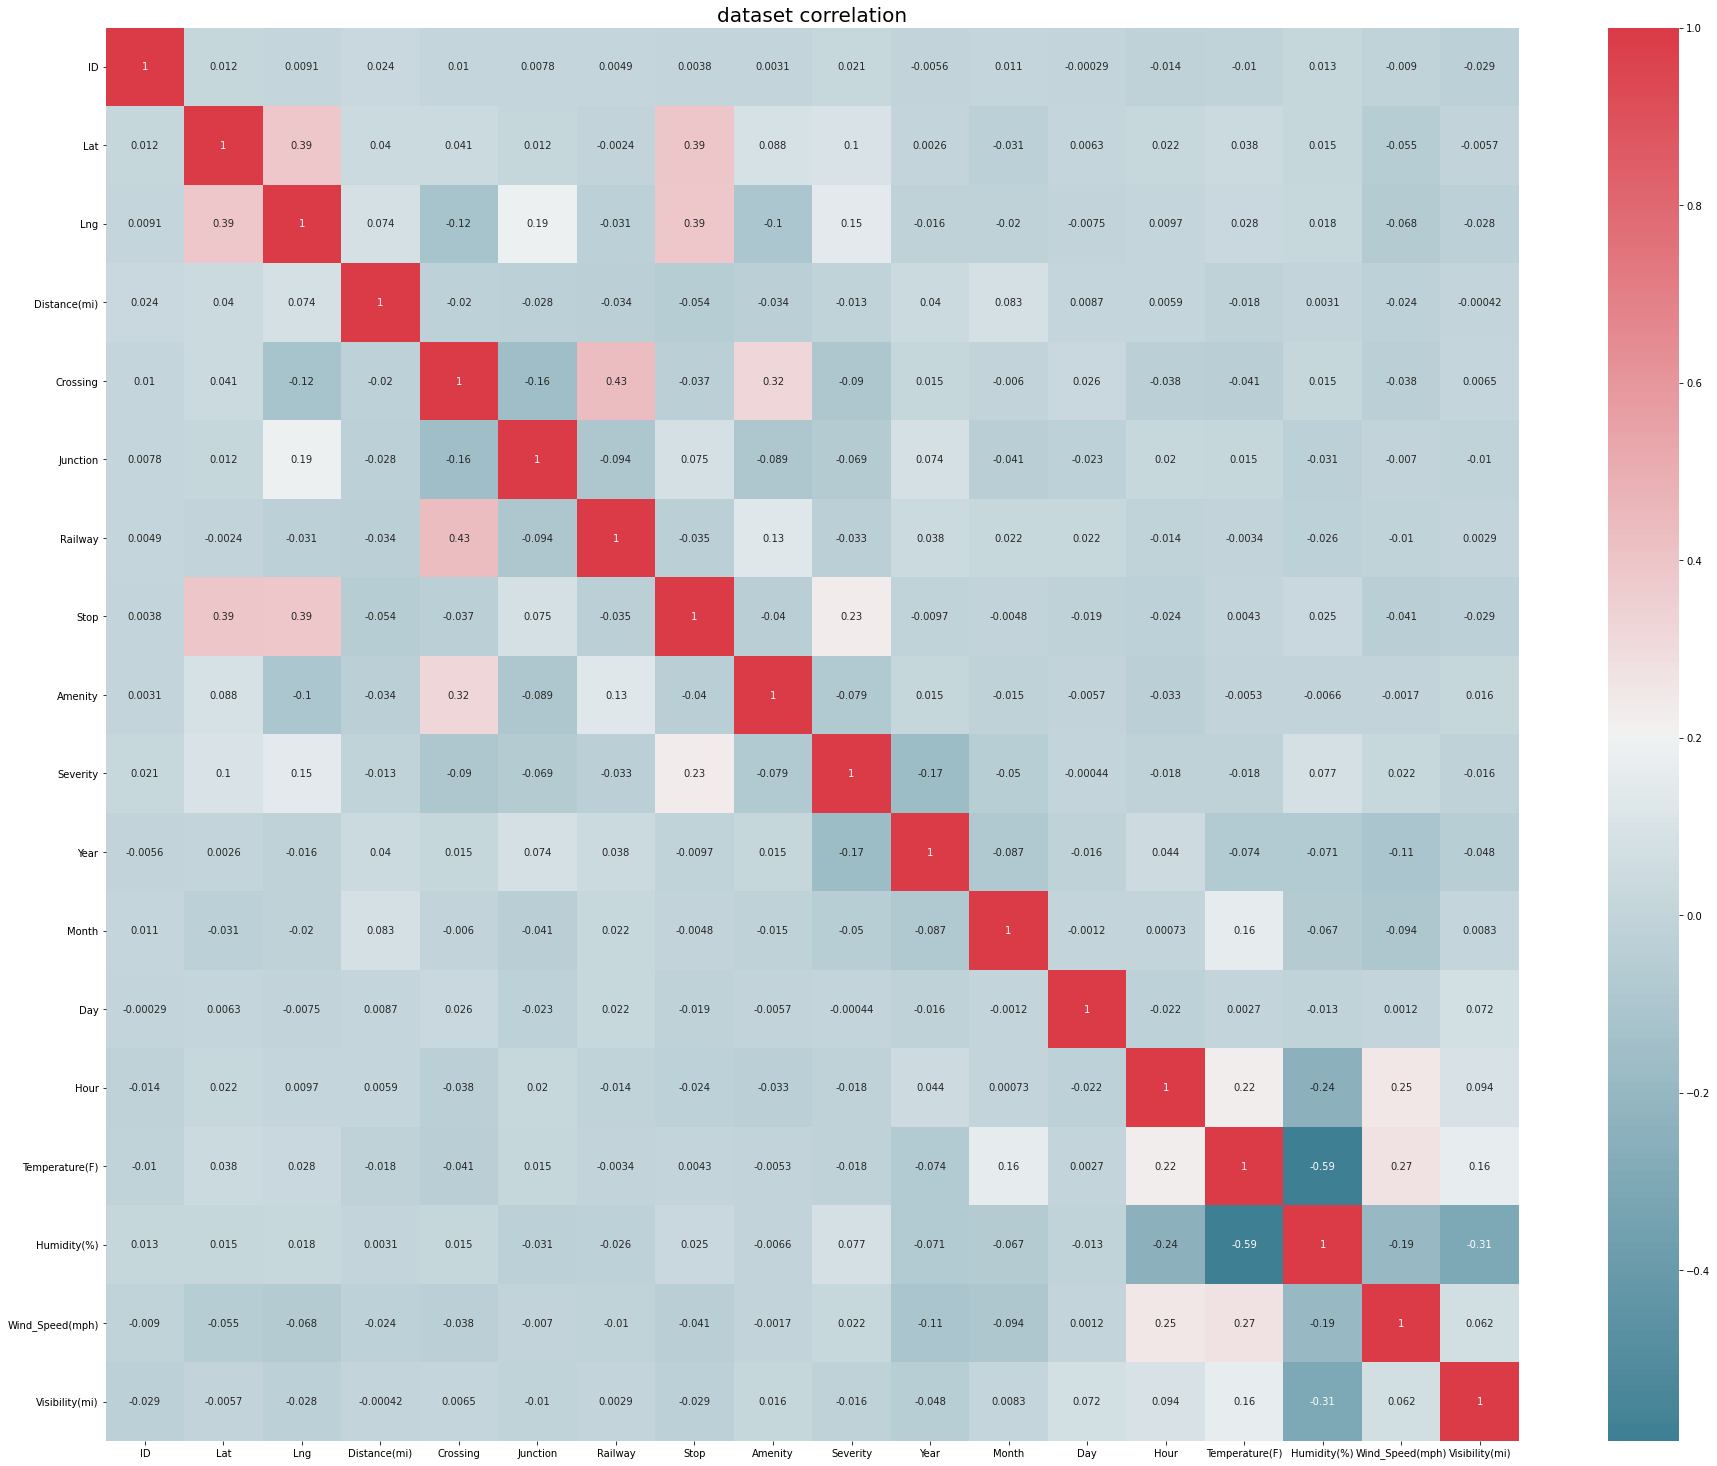

In [18]:
#Plotting the Correlation
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

# Encoding Categorical Columns 

In [19]:
#Encoding  for the train set
#Grouping the values of the weather conditions to 4 main categories 
encoded_cons = []
for con in df["Weather_Condition"].values:
    if "Cloudy"  in con.split(" "):
        encoded_cons.append('Cloudy')
    elif "Fair"  in con.split(" "):
        encoded_cons.append('Fair')
    elif "Rain" in con.split(" "):
        encoded_cons.append('Rain')
    elif "Overcast" in con.split(" "):
        encoded_cons.append('Rain')
    else:
        encoded_cons.append('other')
df['Encoded_Weather'] = encoded_cons
del df["Weather_Condition"]

#Grouping the values of the Hours  to 2 main categories 
encoded_hours = []
for hour in df["Hour"].values :
    if 8>hour>=0:
        encoded_hours.append("hour_1")
    
    else:
        encoded_hours.append("hour_2")
df['Encoded_Hour_effect'] = encoded_hours
del df["Hour"]


#Filling the null values of holiday and adding sat and sun to the holiday
df['description'].fillna("not_holiday",inplace=True)
for con in df["Weekday"].values:
    if not 5 or 6 :
        df["description"]="holiday"
    

In [20]:
#Encoding for the test set
#Grouping the values of the weather conditions to 4 main categories for the test set
encoded_cons_test = []
for con in df_test["Weather_Condition"].values:
    if "Cloudy"  in con.split(" "):
        encoded_cons_test.append('Cloudy')
    elif "Fair" in con.split(" "):
        encoded_cons_test.append('Fair')
    elif "Rain" in con.split(" "):
        encoded_cons_test.append('Rain')
    elif "Overcast" in con.split(" "):
        encoded_cons_test.append('Rain')

    else:
        encoded_cons_test.append('other')
df_test['Encoded_Weather'] = encoded_cons_test
del df_test["Weather_Condition"]

#Grouping the values of the Hours  to 2 main categories 
encoded_hours_test = []
for hour in df_test["Hour"].values :
    if 8>hour>=0:
        encoded_hours_test.append("hour_1")
    else:
        encoded_hours_test.append("hour_2")
df_test['Encoded_Hour_effect'] = encoded_hours_test
del df_test["Hour"]


#Filling the null values of holiday and adding sat and sun to the holiday
df_test['description'].fillna("not_holiday",inplace=True)
for con in df_test["Weekday"].values:
    if not 5 or 6 :
        df_test["description"]="holiday"
    

In [21]:
#Grouping the value of holiday to 2 main categories for train 
encoded_hol = []
for con in df["description"].values:
    if not "not_holiday":
        encoded_hol.append('holiday')
    else:
        encoded_hol.append('not_holiday')
df['description'] = encoded_hol

#Grouping the value of holiday to 2 main categories for test 
encoded_hol_test = []
for con in df_test["description"].values:
    if not "not_holiday":
        encoded_hol_test.append('holiday')
    else:
        encoded_hol_test.append('not_holiday')
df_test['description'] = encoded_hol_test


In [22]:
#One Hot Encoding fot categorical Data for both train and test dataset
cols_names = df.columns

not_categorical = ['ID', 'Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Junction', 'Railway',
       'Stop', 'Amenity',  'Severity', 'Year', 'Month', 'Day', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)',
       'Visibility(mi)']
target= 'Severity'
categorical = [item for item in cols_names if item not in not_categorical and item != target]
print(categorical)
data_onehot = pd.get_dummies(df, columns=categorical)
data_onehot_test = pd.get_dummies(df_test, columns=categorical)


['Side', 'Weekday', 'description', 'Encoded_Weather', 'Encoded_Hour_effect']


# Data Splitting  

In [23]:
data_onehot.columns

Index(['ID', 'Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Junction', 'Railway',
       'Stop', 'Amenity', 'Severity', 'Year', 'Month', 'Day', 'Temperature(F)',
       'Humidity(%)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Side_L', 'Side_R',
       'Weekday_Fri', 'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun',
       'Weekday_Thu', 'Weekday_Tue', 'Weekday_Wed', 'description_not_holiday',
       'Encoded_Weather_Cloudy', 'Encoded_Weather_Fair',
       'Encoded_Weather_Rain', 'Encoded_Weather_other',
       'Encoded_Hour_effect_hour_1', 'Encoded_Hour_effect_hour_2'],
      dtype='object')

In [24]:
#Splitting the data into train and validation 
from sklearn.model_selection import train_test_split

#Train 80 percent , Validation 20 percent
train_df, val_df = train_test_split(data_onehot, test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'Severity','Day' ])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity','Day'])
y_val = val_df['Severity']

# Model 

In [25]:
#Training the model 
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7673692427790788


# Prediction 

In [26]:
data_onehot_test.columns

Index(['ID', 'Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Junction', 'Railway',
       'Stop', 'Amenity', 'Year', 'Month', 'Day', 'Temperature(F)',
       'Humidity(%)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Side_L', 'Side_R',
       'Weekday_Fri', 'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun',
       'Weekday_Thu', 'Weekday_Tue', 'Weekday_Wed', 'description_not_holiday',
       'Encoded_Weather_Cloudy', 'Encoded_Weather_Fair',
       'Encoded_Weather_Rain', 'Encoded_Weather_other',
       'Encoded_Hour_effect_hour_1', 'Encoded_Hour_effect_hour_2'],
      dtype='object')

In [27]:
#Using the test set to predict the output
X_test = data_onehot_test[['Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Junction', 'Railway',
       'Stop', 'Amenity', 'Year', 'Month', 'Temperature(F)',
       'Humidity(%)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Side_L', 'Side_R',
       'Weekday_Fri', 'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun',
       'Weekday_Thu', 'Weekday_Tue', 'Weekday_Wed', 'description_not_holiday',
       'Encoded_Weather_Cloudy', 'Encoded_Weather_Fair',
       'Encoded_Weather_Rain', 'Encoded_Weather_other',
       'Encoded_Hour_effect_hour_1', 'Encoded_Hour_effect_hour_2']]
y_test_predicted = classifier.predict(X_test)

data_onehot_test['Severity'] = y_test_predicted

data_onehot_test.head()


,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Year,...,Weekday_Tue,Weekday_Wed,description_not_holiday,Encoded_Weather_Cloudy,Encoded_Weather_Fair,Encoded_Weather_Rain,Encoded_Weather_other,Encoded_Hour_effect_hour_1,Encoded_Hour_effect_hour_2,Severity
0,6407,37.786060,-122.390900,0.039,False,True,False,False,False,2016,...,0,0,1,1,0,0,0,0,1,2
1,6408,37.769609,-122.415057,0.202,False,False,False,False,False,2020,...,0,1,1,0,1,0,0,0,1,2
2,6409,37.807495,-122.476021,0.000,False,False,False,False,False,2019,...,0,0,1,1,0,0,0,1,0,2
3,6410,37.761818,-122.405869,0.000,False,True,False,False,False,2019,...,1,0,1,0,1,0,0,0,1,2
4,6411,37.732350,-122.414100,0.670,False,False,False,False,False,2018,...,0,1,1,0,0,0,1,0,1,2


# Save the output to CSV file 

In [28]:
#Save the output in a CSV file 
data_onehot_test[['ID', 'Severity']].to_csv('./submission.csv', index=False)
